<a href="https://colab.research.google.com/github/camilletulipe06-wq/Quantitative-Methods-2---Research-Project/blob/main/Part_2_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

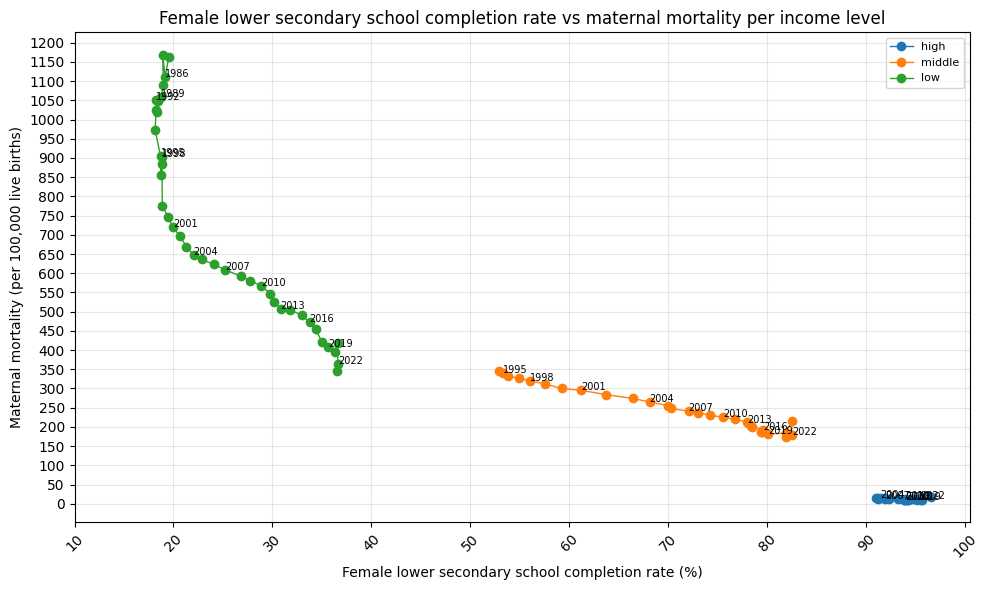

In [1]:
# Scatterplot with 3 trendlines each representing an income level

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv("QM 2 projects data - data by income group.csv")

income_column = "income level"
year_column = "year"
x_column = "lower secondary school completion rate"
y_column = "maternal mortality"

df1[x_column] = pd.to_numeric(df1[x_column], errors="coerce")
df1[y_column] = pd.to_numeric(df1[y_column], errors="coerce")
df1[year_column] = pd.to_numeric(df1[year_column], errors="coerce")

df1 = df1.dropna(subset=[x_column, y_column, year_column])

plt.figure(figsize=(10, 6))

for income in df1[income_column].unique():
    sub = df1[df1[income_column] == income].sort_values(year_column)
    plt.plot(sub[x_column], sub[y_column], marker="o", linewidth=1, label=income)

    for _, row in sub.iterrows():
        if int(row[year_column]) % 3 == 0:
            plt.text(row[x_column], row[y_column], str(int(row[year_column])), fontsize=7)

plt.xlabel("Female lower secondary school completion rate (%)")
plt.ylabel("Maternal mortality (per 100,000 live births)")
plt.title("Female lower secondary school completion rate vs maternal mortality per income level")
plt.legend(fontsize=8)

x_min, x_max = df1[x_column].min(), df1[x_column].max()
y_min, y_max = df1[y_column].min(), df1[y_column].max()

plt.xticks(np.arange(np.floor(x_min/10)*10, np.ceil(x_max/10)*10 + 10, 10), rotation=45)
plt.yticks(np.arange(np.floor(y_min/50)*50, np.ceil(y_max/50)*50 + 50, 50))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

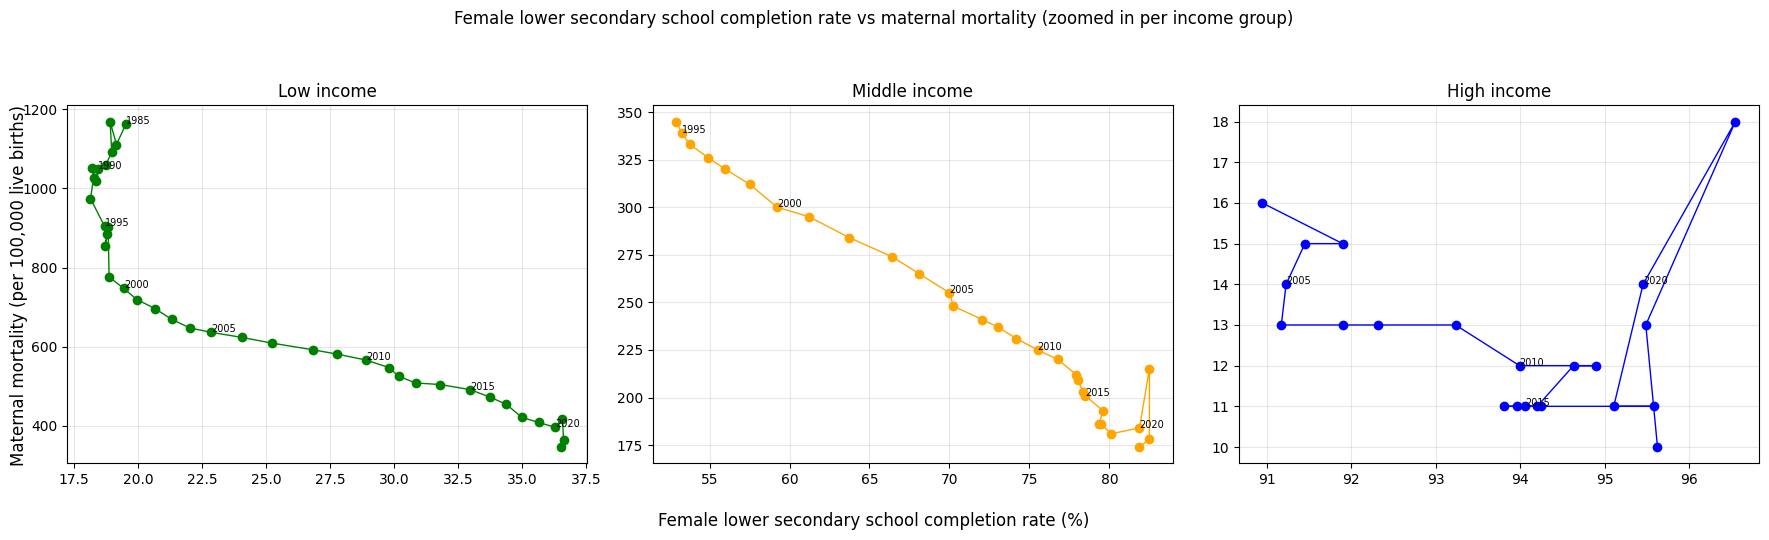

In [2]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=False, sharey=False)

levels = ["low", "middle", "high"]
colors = {"low": "green", "middle": "orange", "high": "blue"}
for ax, level in zip(axes, levels):
    sub = df1[df1[income_column] == level].sort_values(year_column)

    ax.plot(sub[x_column], sub[y_column], marker="o", linewidth=1, color=colors[level])

    for _, row in sub.iterrows():
        if int(row[year_column]) % 5 == 0:
            ax.text(row[x_column], row[y_column], str(int(row[year_column])), fontsize=7)

    ax.set_title(f"{level.capitalize()} income")
    ax.grid(True, alpha=0.3)

    ax.relim()
    ax.autoscale_view()

fig.supxlabel("Female lower secondary school completion rate (%)")
fig.supylabel("Maternal mortality (per 100,000 live births)")
fig.suptitle("Female lower secondary school completion rate vs maternal mortality (zoomed in per income group)", y=1.05)

plt.tight_layout()
plt.show()

In [3]:
# Summary statistics sorted by income level

columns = ["lower secondary school completion rate", "maternal mortality"]

s_df1 = df1[[income_column] + columns]

summary_by_income = s_df1.groupby(income_column)[columns].describe().round(2)

summary_by_income

lower secondary school completion rate                       \
                                              count   mean    std    min   
income level                                                               
high                                           22.0  93.72   1.70  90.95   
low                                            39.0  25.13   6.93  18.14   
middle                                         30.0  70.63  10.16  52.93   

                                         maternal mortality                  \
                25%    50%    75%    max              count    mean     std   
income level                                                                  
high          92.00  94.03  95.06  96.55               22.0   12.73    1.98   
low           18.85  22.03  31.32  36.62               39.0  717.26  255.20   
middle        61.85  73.61  79.13  82.50               30.0  245.73   54.75   

                                                   
                min    25%    50%     75%     max  
income level                                       
high           10.0   11.0   12.5   13.75    18.0  
low           346.0  506.0  647.0  939.00  1169.0  
middle        174.0  201.5  234.0  292.25   345.0

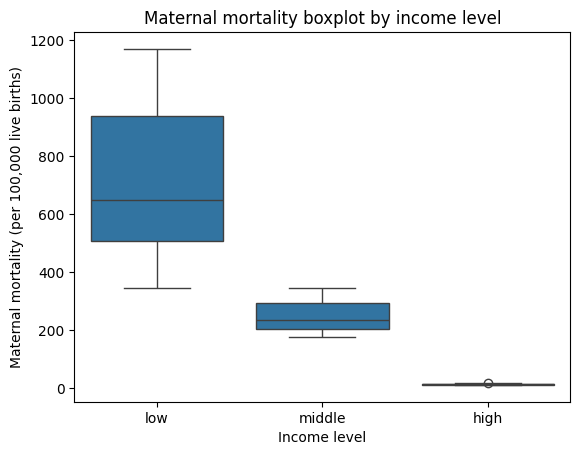

In [4]:
# Maternal mortality boxplot by income level

import seaborn as sns

sns.boxplot(data=df1, x="income level", y="maternal mortality", order=["low", "middle", "high"])

plt.xlabel("Income level")
plt.ylabel("Maternal mortality (per 100,000 live births)")
plt.title("Maternal mortality boxplot by income level")
plt.show()

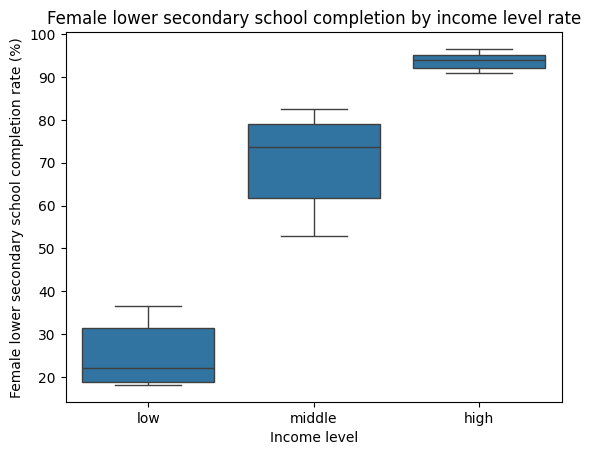

In [5]:
# Female lower secondary school completion rate by income level

sns.boxplot(data=df1, x="income level", y="lower secondary school completion rate", order=["low", "middle", "high"])

plt.xlabel("Income level")
plt.ylabel("Female lower secondary school completion rate (%)")
plt.title("Female lower secondary school completion by income level rate")
plt.show()

Text(0.5, 0.98, 'Female lower secondary school completion rate vs maternal mortality by income level')

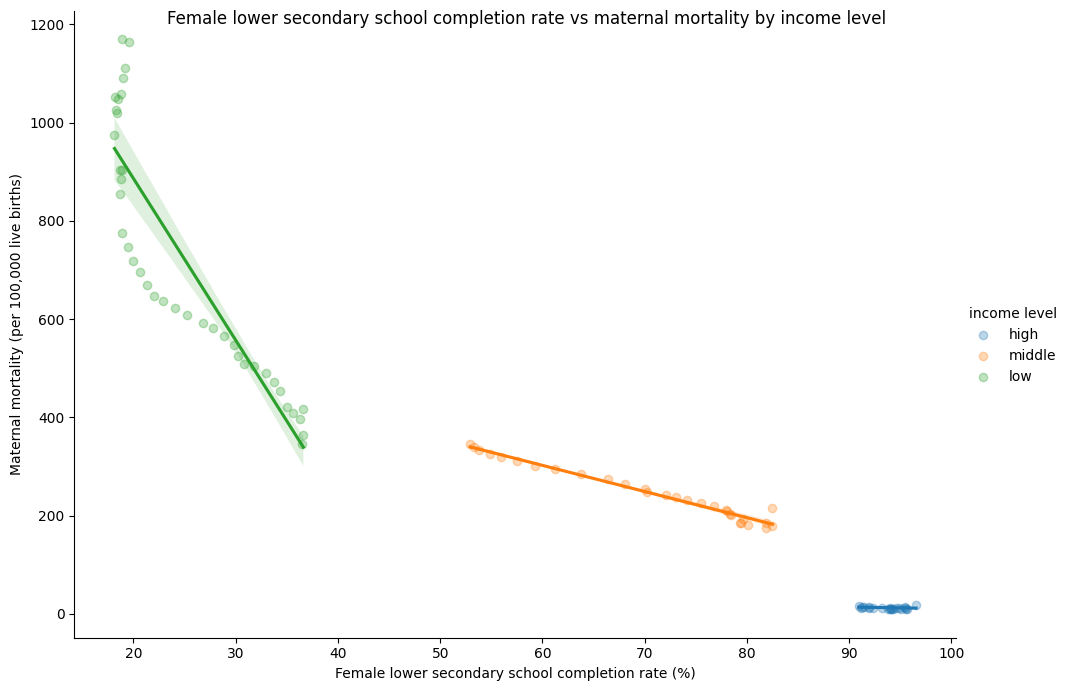

In [6]:
# Regression plot

g = sns.lmplot(data=df1, x=x_column, y=y_column, hue=income_column, scatter_kws={"alpha": 0.3}, height=7, aspect=1.4)

g.set_axis_labels("Female lower secondary school completion rate (%)", "Maternal mortality (per 100,000 live births)")

g.fig.suptitle("Female lower secondary school completion rate vs maternal mortality by income level")


In [7]:
df1['income level index'] = df1[['income level index']].astype('category')


Text(0.5, 1.0, 'Correlation Matrix')

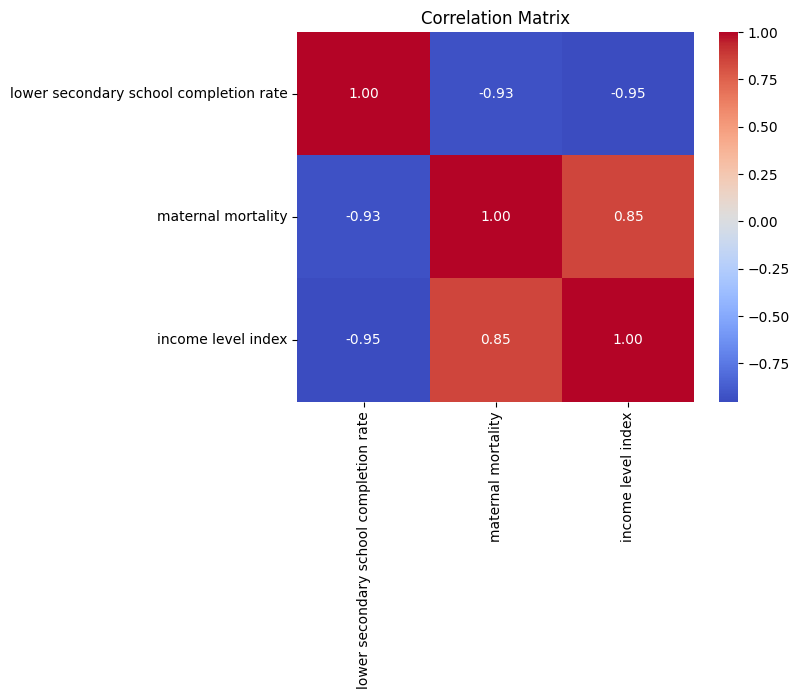

In [8]:
# Correlation matrix

sns.heatmap(df1[["lower secondary school completion rate", "maternal mortality", "income level index"]].corr(),
            annot=True,
            fmt=".2f",
            cmap='coolwarm')

plt.title('Correlation Matrix')

In [9]:
import statsmodels.formula.api as smf

df1 = df1.rename(columns={
    "income level": "income_group",
    "lower secondary school completion rate": "education",
    "maternal mortality": "mmr"
})

df1["year"] = pd.to_numeric(df1["year"], errors="coerce")
df1["education"] = pd.to_numeric(df1["education"], errors="coerce")
df1["mmr"] = pd.to_numeric(df1["mmr"], errors="coerce")
df1 = df1.dropna(subset=["income_group","year","education","mmr"])


In [10]:
df1["ln_mmr"] = np.log(df1["mmr"])

In [11]:
for g in ["low", "middle", "high"]:
    sub = df1[df1["income_group"] == g].copy()
    model = smf.ols("ln_mmr ~ education", data=sub).fit()
    print("\n", "="*60)
    print(f"Income group: {g}")
    print(model.summary())


Income group: low
                            OLS Regression Results                            
Dep. Variable:                 ln_mmr   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     289.6
Date:                Fri, 09 Jan 2026   Prob (F-statistic):           4.38e-19
Time:                        22:13:41   Log-Likelihood:                 26.978
No. Observations:                  39   AIC:                            -49.96
Df Residuals:                      37   BIC:                            -46.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7573      0.076 

In [18]:
df1["income_group"] = pd.Categorical(df1["income_group"], categories=["low","middle","high"])

interaction = smf.ols("ln_mmr ~ education * C(income_group) + year", data=df1).fit()
print(interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mmr   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6306.
Date:                Sat, 27 Dec 2025   Prob (F-statistic):          3.02e-109
Time:                        15:12:32   Log-Likelihood:                 106.24
No. Observations:                  91   AIC:                            -198.5
Df Residuals:                      84   BIC:                            -180.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [20]:
df1["income_group"] = pd.Categorical(df1["income_group"], categories=["low","middle","high"])

df1["education_c"] = df1["education"] - df1["education"].mean()
df1["year_c"] = df1["year"] - df1["year"].mean()

m_c = smf.ols("ln_mmr ~ education_c * C(income_group) + year_c", data=df1).fit()
print(m_c.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mmr   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6306.
Date:                Sat, 27 Dec 2025   Prob (F-statistic):          3.02e-109
Time:                        15:13:53   Log-Likelihood:                 106.24
No. Observations:                  91   AIC:                            -198.5
Df Residuals:                      84   BIC:                            -180.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [21]:
print("Education (LOW baseline slope):", interaction.params["education"])
print("Extra slope for MIDDLE (difference vs low):", interaction.params["education:C(income_group)[T.middle]"])
print("Extra slope for HIGH (difference vs low):", interaction.params["education:C(income_group)[T.high]"])

Education (LOW baseline slope): -0.010296853045274848
Extra slope for MIDDLE (difference vs low): 0.01045007063162065
Extra slope for HIGH (difference vs low): 0.06968993009616253


In [22]:
low_slope = interaction.params["education"]
middle_slope = interaction.params["education"] + interaction.params["education:C(income_group)[T.middle]"]
high_slope = interaction.params["education"] + interaction.params["education:C(income_group)[T.high]"]

print("\nSlopes of education on ln_mmr:")
print("Low income slope =", low_slope)
print("Middle income slope =", middle_slope)
print("High income slope =", high_slope)


Slopes of education on ln_mmr:
Low income slope = -0.010296853045274848
Middle income slope = 0.0001532175863458024
High income slope = 0.059393077050887685


In [23]:
print("\nApprox % change in MMR for a +1pp increase in education:")
print("Low income ≈", 100*low_slope, "%")
print("Middle income ≈", 100*middle_slope, "%")
print("High income ≈", 100*high_slope, "%")


Approx % change in MMR for a +1pp increase in education:
Low income ≈ -1.0296853045274847 %
Middle income ≈ 0.01532175863458024 %
High income ≈ 5.939307705088768 %
